In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join

import sys
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib as mpl
import matplotlib.pyplot as plt

# Particle position histogram

    First, I will read the .lammpstrj of all the simulations and convert those to col_trj. After that I will save only the last frame, since the whole dataframe uses a lot of memory.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.2"

In [5]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "ACI_CairoLattice_50mT-1500s_higherHill_l10_exp*.lammpstrj"):
        print(file)
        load_obj = mgc.trj_lazyread(os.path.join(data_directory,file),
                                                    output = ["x","y","z","mux","muy","muz"]) 
        bnd = load_obj.get_bounds()
        trj = load_obj.read_trj()
        col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])
        Cairo.append(col_trj)
        
    
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)
    

ACI_CairoLattice_50mT-1500s_higherHill_l10_exp5.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp2.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp7.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp6.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp9.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp0.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp4.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp1.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp3.lammpstrj
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp8.lammpstrj


In [37]:
750*50/1500

25.0

In [6]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [7]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [93]:
last_frame = Cairo_exp.query('frame == 150000')

In [94]:
last_frame.to_csv(join(data_directory,"col_trj_lastFrame_1500s"), sep = "\t")

    Now, I will import the col_trj_lasFrame file

In [35]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join

import sys
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib as mpl
import matplotlib.pyplot as plt

In [48]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.2"

In [49]:
col_trj = pd.read_csv(join(data_directory,"col_trj_lastFrame_1500s"), sep = "\t", index_col = [0,1,2])

In [50]:
last_frame = 150000


In [51]:
field =last_frame*50/150000
field

50.0

In [52]:
col_trj = col_trj.reset_index()
del col_trj['Exp']
col_trj = col_trj.set_index(['frame','id'])
col_trj

type         x           y    z       dx       dy   dz        cx  \
frame  id                                                                       
150000 0        2    0.0000    0.000000  0.0 -4.52580 -0.00000 -0.0 -2.256930   
       1        2    0.0000   46.352000  0.0  0.00000  4.52580  0.0 -0.083057   
       2        2   46.3235  -46.380400  0.0 -4.52580 -0.00000 -0.0 -1.771801   
       3        2   46.3235   -0.028435  0.0 -0.00000 -4.52580 -0.0 -0.058701   
       4        2   92.6471    0.000000  0.0  4.52580  0.00000  0.0  1.972496   
...           ...       ...         ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.851000  0.0 -5.00000 -8.66025 -0.0 -1.805969   
       1996     3  896.1930 -891.582000  0.0  5.00000 -8.66025  0.0  2.333984   
       1997     3  915.6340 -864.670000  0.0  8.66025 -5.00000  0.0  4.248047   
       1998     3  910.4250 -845.201000  0.0  5.00000  8.66025  0.0  2.578003   
       1999     3  891.0130 -818.318000  0.0  8.66025  5.00000  0.0  0.747986   

                   cy   cz  
frame  id                   
150000 0     0.018543  0.0  
       1     2.238400  0.0  
       2     0.000900  0.0  
       3    -2.165645  0.0  
       4    -0.009324  0.0  
...               ...  ...  
       1995 -3.122009  0.0  
       1996 -4.212036  0.0  
       1997 -2.356995  0.0  
       1998  4.263977  0.0  
       1999  0.346985  0.0  

[20000 rows x 10 columns]

(-100, -300)

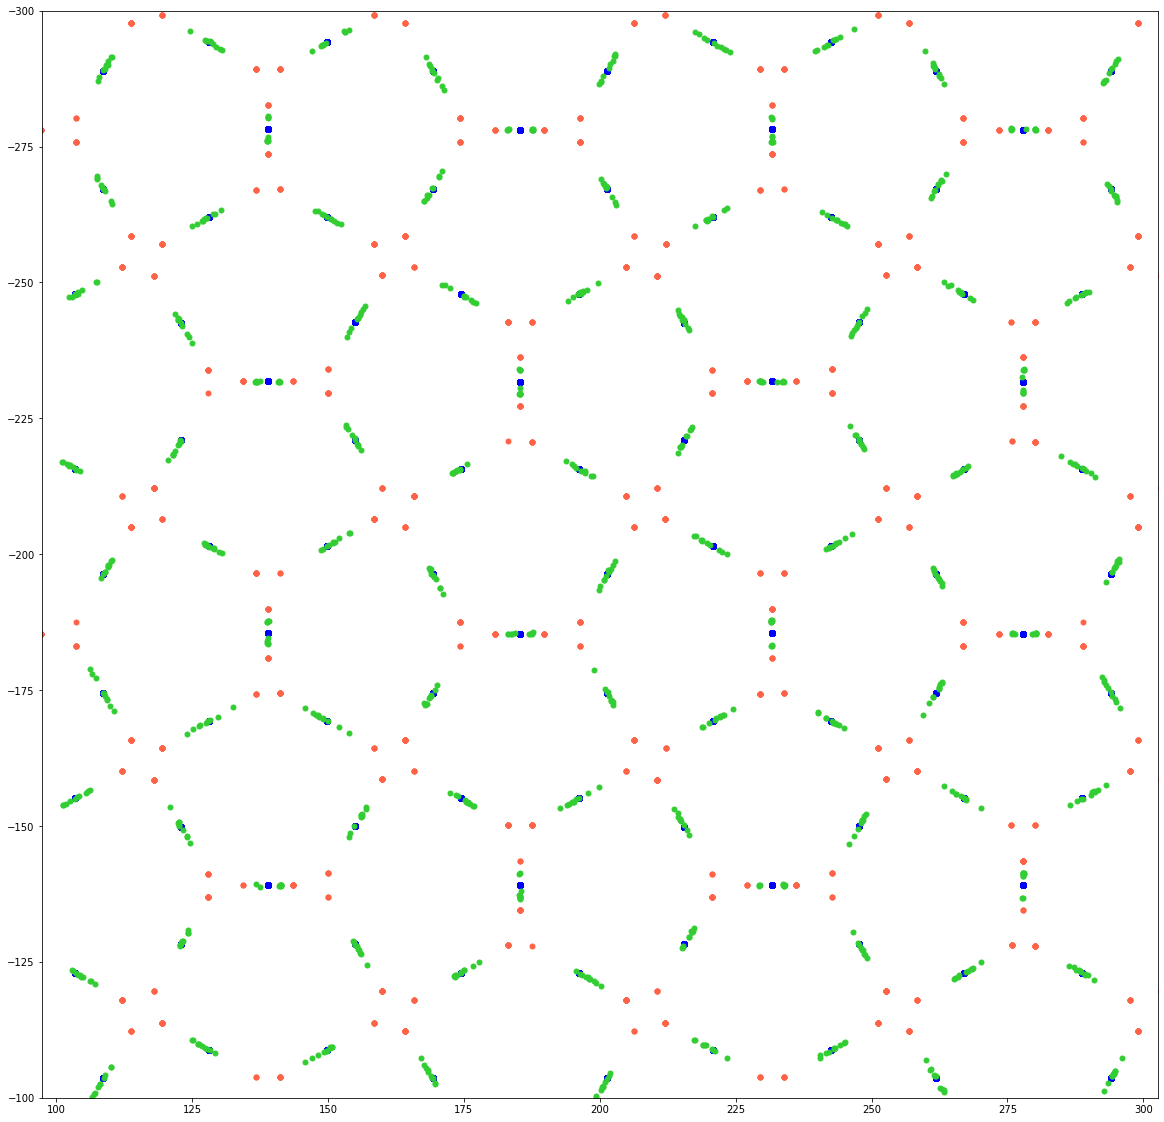

In [53]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(col_trj.loc[last_frame].x,col_trj.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(col_trj.loc[last_frame].x+col_trj.loc[last_frame].cx,
         col_trj.loc[last_frame].y+col_trj.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(col_trj.loc[last_frame].x+col_trj.loc[last_frame].dx,
         col_trj.loc[last_frame].y+col_trj.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [54]:
col_trj

type         x           y    z       dx       dy   dz        cx  \
frame  id                                                                       
150000 0        2    0.0000    0.000000  0.0 -4.52580 -0.00000 -0.0 -2.256930   
       1        2    0.0000   46.352000  0.0  0.00000  4.52580  0.0 -0.083057   
       2        2   46.3235  -46.380400  0.0 -4.52580 -0.00000 -0.0 -1.771801   
       3        2   46.3235   -0.028435  0.0 -0.00000 -4.52580 -0.0 -0.058701   
       4        2   92.6471    0.000000  0.0  4.52580  0.00000  0.0  1.972496   
...           ...       ...         ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.851000  0.0 -5.00000 -8.66025 -0.0 -1.805969   
       1996     3  896.1930 -891.582000  0.0  5.00000 -8.66025  0.0  2.333984   
       1997     3  915.6340 -864.670000  0.0  8.66025 -5.00000  0.0  4.248047   
       1998     3  910.4250 -845.201000  0.0  5.00000  8.66025  0.0  2.578003   
       1999     3  891.0130 -818.318000  0.0  8.66025  5.00000  0.0  0.747986   

                   cy   cz  
frame  id                   
150000 0     0.018543  0.0  
       1     2.238400  0.0  
       2     0.000900  0.0  
       3    -2.165645  0.0  
       4    -0.009324  0.0  
...               ...  ...  
       1995 -3.122009  0.0  
       1996 -4.212036  0.0  
       1997 -2.356995  0.0  
       1998  4.263977  0.0  
       1999  0.346985  0.0  

[20000 rows x 10 columns]

In [55]:
type2 = col_trj.query('dx == 0 or dy == 0')
type3 = col_trj.query('dx == 5 or dy == 5 or dx == -5 or dy == -5')

In [56]:
type3

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
150000 400      3  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -0.564899   
       401      3  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -4.255099   
       402      3   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -2.828601   
       403      3   16.0461   10.8655  0.0  5.00000  8.66025  0.0  2.040199   
       404      3   16.0461  -10.8655  0.0 -5.00000  8.66025 -0.0 -1.846201   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.805969   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.333984   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.248047   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.578003   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  0.747986   

                   cy   cz  
frame  id                   
150000 400   0.880199  0.0  
       401  -2.341301  0.0  
       402   1.730198  0.0  
       403   3.484400  0.0  
       404   3.221400  0.0  
...               ...  ...  
       1995 -3.122009  0.0  
       1996 -4.212036  0.0  
       1997 -2.356995  0.0  
       1998  4.263977  0.0  
       1999  0.346985  0.0  

[16000 rows x 10 columns]

(-100, -300)

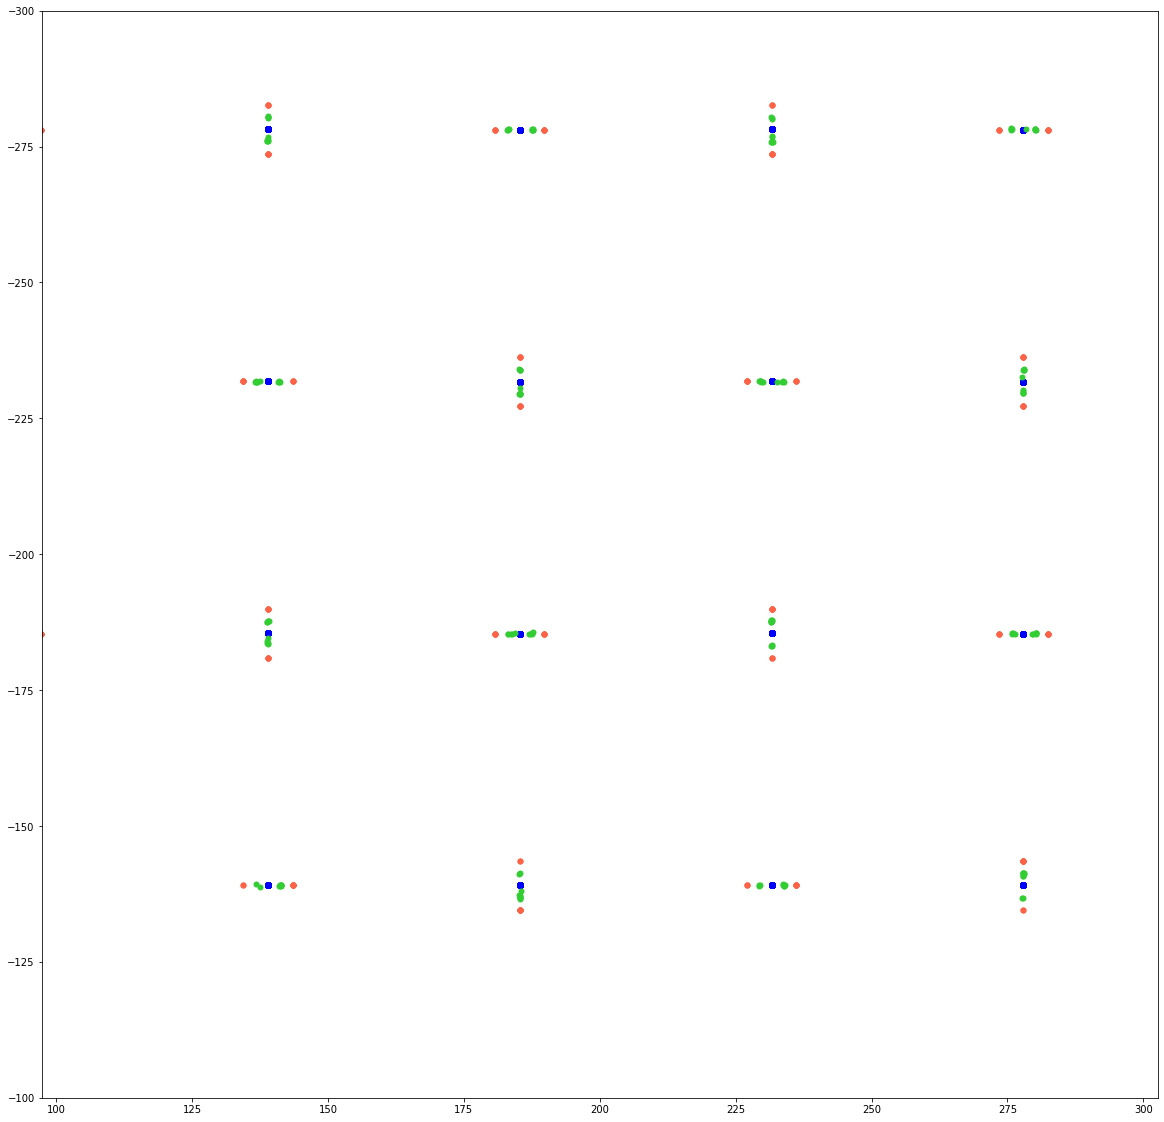

In [57]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type2.loc[last_frame].x,type2.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type2.loc[last_frame].x+type2.loc[last_frame].cx,
         type2.loc[last_frame].y+type2.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type2.loc[last_frame].x+type2.loc[last_frame].dx,
        type2.loc[last_frame].y+type2.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [58]:
type2_v = type2.query('dy == 0 or dy == -0')
type2_h = type2.query('dx == 0 or dx == -0')

Text(0.5, 1.0, 'short traps')

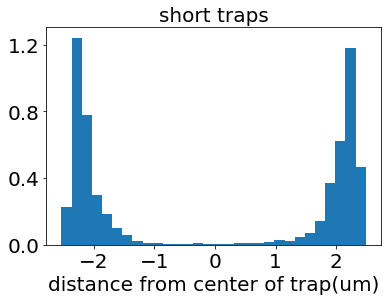

In [59]:
type2_v.loc[last_frame]['cx'].hist(bins = 30,density = 1, grid = False)
#type2_h.loc[last_frame]['cy'].hist(bins = 30,density = 1)
plt.xlabel('distance from center of trap(um)', size = 20)
plt.xticks(size = 20)
plt.yticks([0,0.4,0.8,1.2],size = 20)
plt.title('short traps', size = 20)
#plt.savefig('hist_short'+str(field)+'.png', bbox_inches='tight')

(-100, -300)

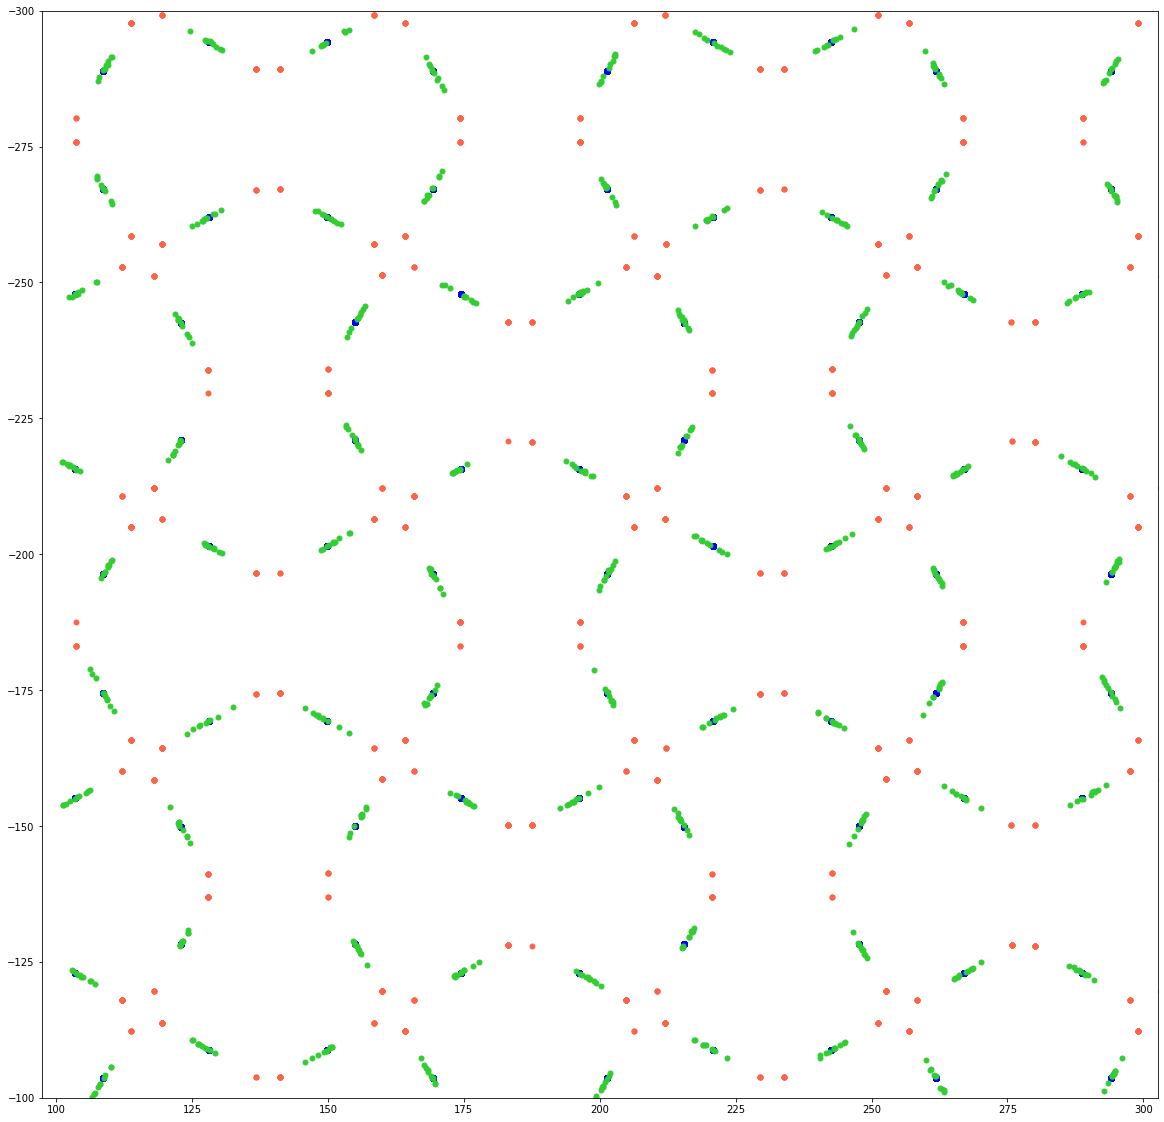

In [60]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3.loc[last_frame].x,type3.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type3.loc[last_frame].x+type3.loc[last_frame].cx,
         type3.loc[last_frame].y+type3.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3.loc[last_frame].x+type3.loc[last_frame].dx,
         type3.loc[last_frame].y+type3.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [61]:
type3

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
150000 400      3  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -0.564899   
       401      3  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -4.255099   
       402      3   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -2.828601   
       403      3   16.0461   10.8655  0.0  5.00000  8.66025  0.0  2.040199   
       404      3   16.0461  -10.8655  0.0 -5.00000  8.66025 -0.0 -1.846201   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.805969   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.333984   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.248047   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.578003   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  0.747986   

                   cy   cz  
frame  id                   
150000 400   0.880199  0.0  
       401  -2.341301  0.0  
       402   1.730198  0.0  
       403   3.484400  0.0  
       404   3.221400  0.0  
...               ...  ...  
       1995 -3.122009  0.0  
       1996 -4.212036  0.0  
       1997 -2.356995  0.0  
       1998  4.263977  0.0  
       1999  0.346985  0.0  

[16000 rows x 10 columns]

In [62]:
type3_v = type3.query('dx == 5 or dx == -5')
type3_h = type3.query('dy == 5 or dy == -5')

(-100, -300)

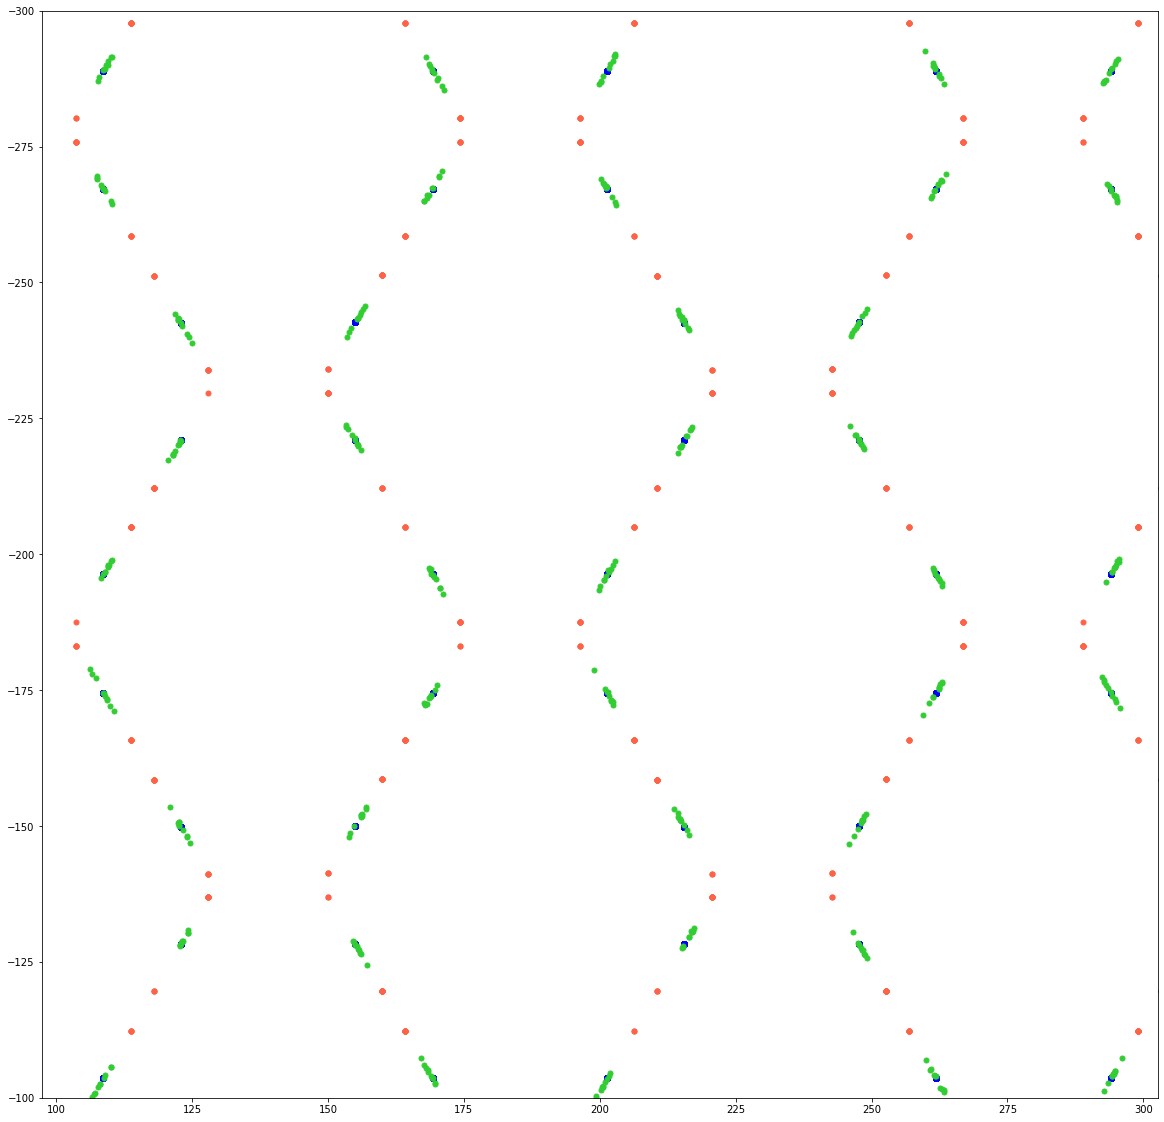

In [63]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3_v.loc[last_frame].x,type3_v.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type3_v.loc[last_frame].x+type3_v.loc[last_frame].cx,
         type3_v.loc[last_frame].y+type3_v.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_v.loc[last_frame].x+type3_v.loc[last_frame].dx,
         type3_v.loc[last_frame].y+type3_v.loc[last_frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [64]:
import numpy as np

In [65]:
type3_v['cy']= type3_v['cy']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.axis.YTick at 0x7f91d5c8ad10>,
 <a list of 5 Text yticklabel objects>)

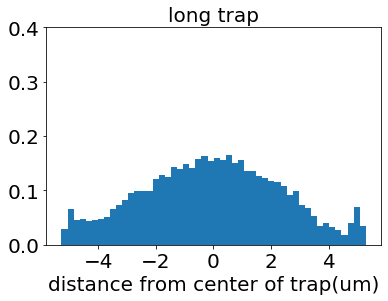

In [66]:
type3_v.loc[last_frame]['cy'].hist(bins = 50, density = 1, grid = False)
plt.xlabel('distance from center of trap(um)', size = 20)
plt.xticks(size = 20)
plt.title('long trap', size = 20)
plt.yticks([0,0.1,0.2,0.3,0.4],size = 20)
#plt.savefig('hist_long'+str(field)+'.png', bbox_inches='tight')

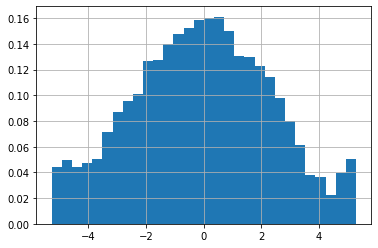

In [67]:
type3_v['cy'].hist(bins = 30,density=1)

(-100, -300)

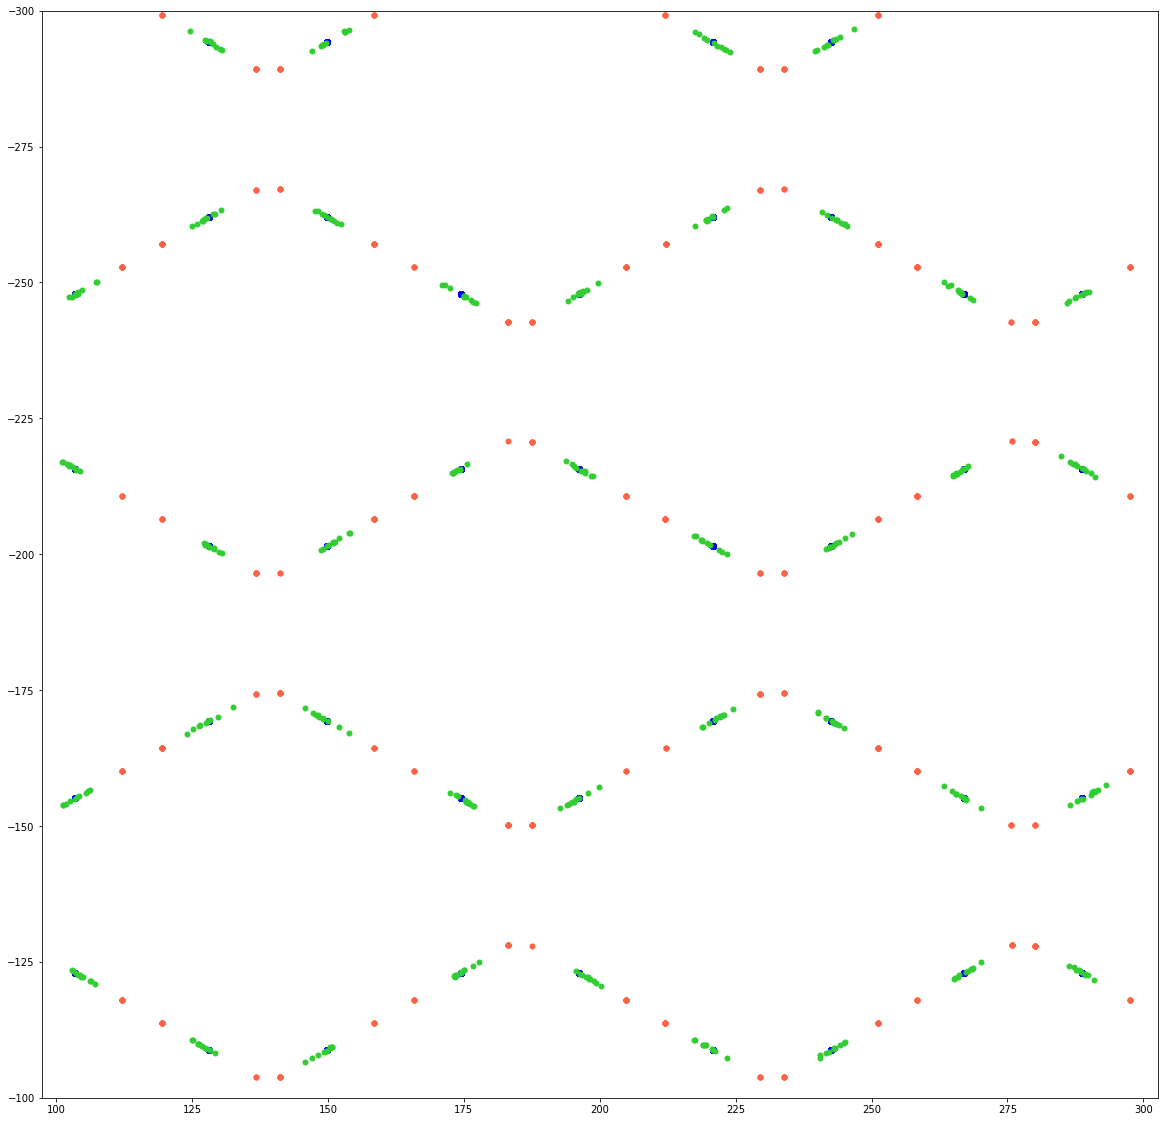

In [68]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3_h.loc[last_frame].x,type3_h.loc[last_frame].y,'o', color ="blue")
# colloid positon
plt.plot(type3_h.loc[last_frame].x+type3_h.loc[last_frame].cx,
         type3_h.loc[last_frame].y+type3_h.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_h.loc[last_frame].x+type3_h.loc[last_frame].dx,
         type3_h.loc[last_frame].y+type3_h.loc[last_frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [69]:
type3_h['cx'] = type3_h['cx']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.axis.YTick at 0x7f91d5ebbe90>,
 <a list of 5 Text yticklabel objects>)

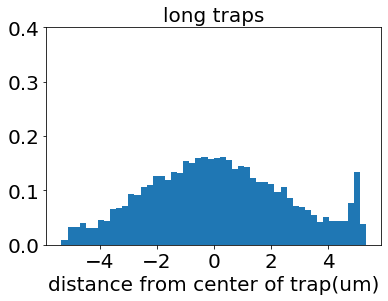

In [70]:


type3_h.loc[last_frame]['cx'].hist(bins = 50,density=1, grid = False)
plt.title('long traps', size = 20)
plt.xlabel('distance from center of trap(um)', size = 20)
plt.xticks(size = 20)
plt.yticks([0,0.1,0.2,0.3,0.4],size = 20)
#plt.savefig('hist_long'+str(field)+'.png')

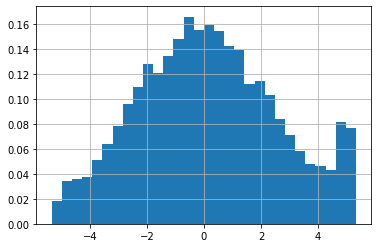

In [71]:
type3_h['cx'].hist(bins = 30,density=1)